In [111]:
from network import Net
from trainers import *
import numpy as np
import pandas as pd

In [112]:
"""
network = Net()
# adding layers can be automatized
network.add_layer(3, 'relu')
network.add_layer(4, 'relu')
network.add_layer(3, 'relu')
network.add_layer(4, 'sigmoid')
network.print_structure()

for i in range(len(network._W)):
    print(network._W[i].shape)

network._W
"""

"\nnetwork = Net()\n# adding layers can be automatized\nnetwork.add_layer(3, 'relu')\nnetwork.add_layer(4, 'relu')\nnetwork.add_layer(3, 'relu')\nnetwork.add_layer(4, 'sigmoid')\nnetwork.print_structure()\n\nfor i in range(len(network._W)):\n    print(network._W[i].shape)\n\nnetwork._W\n"

Layer 1: Units = 4, Activation = relu
Layer 2: Units = 1, Activation = sigmoid


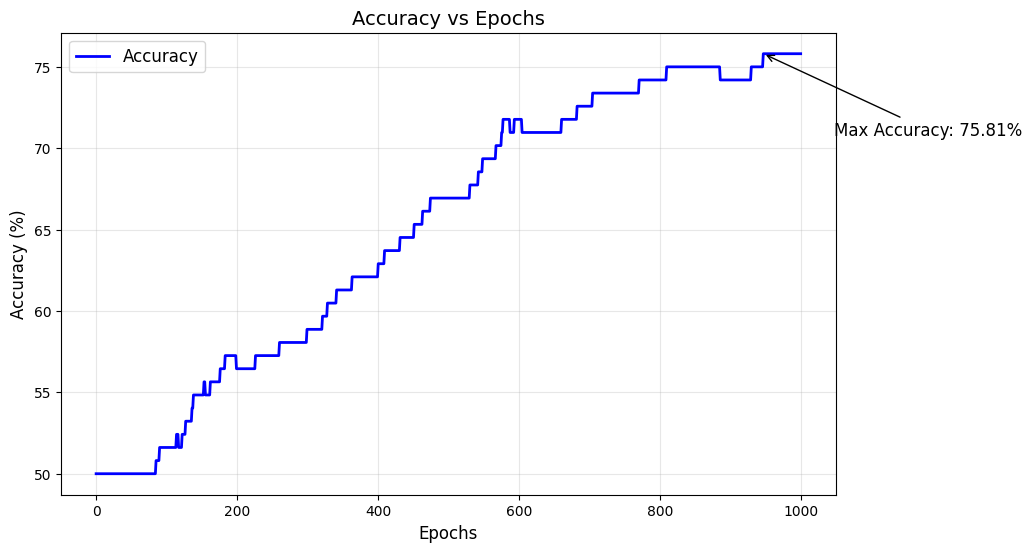

In [113]:
file_path = r'C:\Users\t-tan\OneDrive\Documenti\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\monk_dataset\monks-1.train'
data = pd.read_csv(file_path, delimiter=' ', header=None, skipinitialspace=True)
data = np.array(data).T
n, m = data.shape # r, c
#np.random.shuffle(data)
# n,m == 8 124

Y_tr = data[0]
X_tr = data[1:n-1]

network = Net()
network.add_layer(4, 'relu')
network.add_layer(1, 'sigmoid')
network.print_structure()

model = train('gd', X_tr, Y_tr, network.get_W(), network.get_b(), network.get_layers(),'bin_classification', 1000, 0.01, 'none' )

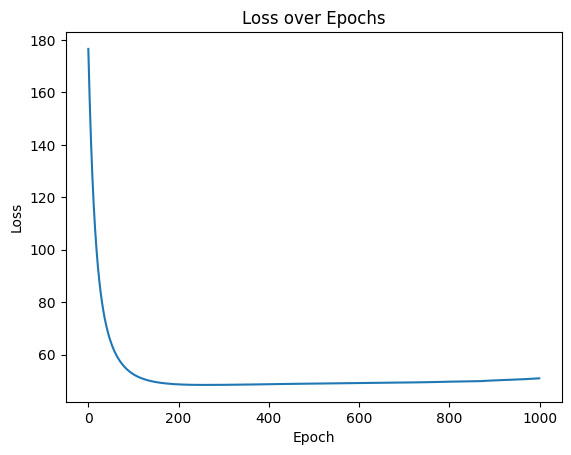

In [114]:
loss_df = pd.read_csv('loss_values.csv')

plt.plot(loss_df['epoch'], loss_df['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()

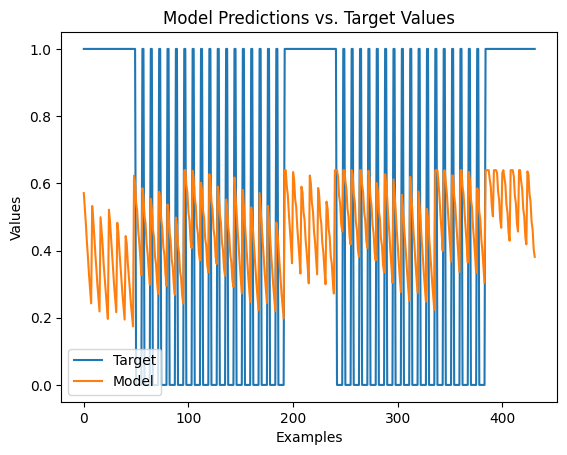

In [115]:
# testing the model on test set
def testing(layers, W, b, X, Y): #essentially, a cicle of Forward prop
    Z = [None] * len(layers)
    A = [None] * len(layers)

    #Z[0] = W[0].dot(X) + b[0]
    #A[0] = layers[0].activate(Z[0])

    for i in range(len(layers)):
        Z[i] = W[i].dot(A[i-1] if i > 0 else X) + b[i]
        A[i] = layers[i].activate(Z[i])
    
    #plotting the graphic of targets vs predicions
    plt.plot(Y.flatten(), label="Target")
    plt.plot(A[-1].flatten(), label="Model")
    plt.xlabel("Examples")
    plt.ylabel("Values")
    plt.title("Model Predictions vs. Target Values")
    plt.legend()
    plt.show()

    df = pd.DataFrame(data)
    df.to_csv('target_vs_prediction.csv', index=False)

file_path = r'C:\Users\t-tan\OneDrive\Documenti\UNI\MAGISTRALE\ML\nn_from_scratch\datasets\monk_dataset\monks-1.test'
data = pd.read_csv(file_path, delimiter=' ', header=None, skipinitialspace=True)
data = np.array(data).T
n, m = data.shape
Y_test = data[0]
X_test = data[1:n-1]

Y_test.shape

testing(network.get_layers(), model[0], model[1], X_test, Y_test)